In [ ]:
import netCDF4
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from findiff import FinDiff, Gradient, Divergence, Curl, Laplacian

In [ ]:
filename = "/Users/mgjeon/workspace/12673_20170906_000000.nc"

In [ ]:
import os

In [ ]:
from dateutil.parser import parse

In [ ]:
parse(os.path.basename(filename).split('.')[0][6:].replace('_', 'T'))

datetime.datetime(2017, 9, 6, 0, 0)

In [ ]:
os.path.basename(filename)[-18:-3]

'20170906_000000'

In [ ]:
nc = netCDF4.Dataset(filename, 'r')

x = np.array(nc.variables['x'])
y = np.array(nc.variables['y'])
z = np.array(nc.variables['z'])

Bx = np.array(nc.variables['Bx']).transpose(2, 1, 0)
By = np.array(nc.variables['By']).transpose(2, 1, 0)
Bz = np.array(nc.variables['Bz']).transpose(2, 1, 0)

dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]

Bx.shape, dx, dy, dz

((513, 257, 257), 0.48969578700000227, 0.6377433539999942, 0.637743354)

In [ ]:
curl = Curl(h=[dx, dy, dz])

In [ ]:
B = np.stack([Bx, By, Bz])
J = curl(B)

J.shape, B.shape

((3, 513, 257, 257), (3, 513, 257, 257))

In [ ]:
norm_J = np.linalg.norm(J, axis=0)
norm_J.shape

(513, 257, 257)

Text(0.5, 1.0, '|J| (G/Mm)')

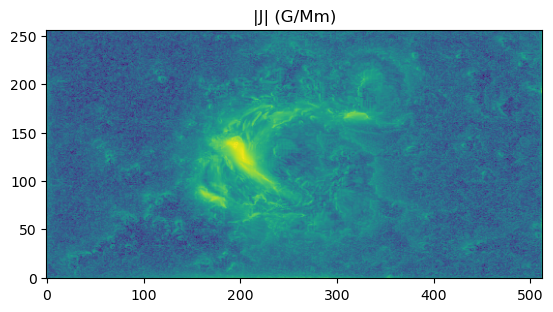

In [ ]:
plt.imshow(norm_J.sum(-1).T, origin='lower', norm=LogNorm())
plt.title("|J| (G/Mm)")

In [ ]:
Jx = J[0]
Jy = J[1]
Jz = J[2]

Jx.shape

(513, 257, 257)

In [ ]:
JxB_xcomp = Jy*Bz - Jz*By 
JxB_ycomp = Jz*Bx - Jx*Bz 
JxB_zcomp = Jx*By - Jy*Bx 

JxB = np.stack([JxB_xcomp, JxB_ycomp, JxB_zcomp])
JxB.shape

(3, 513, 257, 257)

In [ ]:
J[:, 0, 0, 0], B[:, 0, 0, 0], JxB[:, 0, 0, 0], np.cross(J[:, 0, 0, 0], B[:, 0, 0, 0])

(array([-275.37846959,   29.75024159,  -54.95084803]),
 array([ -6.53000021, -30.25      ,  13.77999973]),
 array([-1252.30483173,  4153.5442865 ,  8524.46778875]),
 array([-1252.30483173,  4153.5442865 ,  8524.46778875]))

In [ ]:
np.cross([1, 4, 7], [7, 4, 1])

array([-24,  48, -24])

In [ ]:
F = np.array([[1,2,3,2], [4,5,6,5], [7,8,9,8]])
G = np.array([[7,8,9,8], [4,5,6,5], [1,2,3,2]])
F.shape, F[:, 0], G[:, 0]

((3, 4), array([1, 4, 7]), array([7, 4, 1]))

In [ ]:
np.cross(F, G, axisa=0, axisb=0)

array([[-24,  48, -24],
       [-30,  60, -30],
       [-36,  72, -36],
       [-30,  60, -30]])

In [ ]:
JxB_numpy = np.cross(J, B, axisa=0, axisb=0, axisc=0)
JxB_numpy.shape

(3, 513, 257, 257)

In [ ]:
np.allclose(JxB, JxB_numpy)

True

In [ ]:
norm_JxB = np.linalg.norm(JxB, axis=0)
norm_JxB.shape

(513, 257, 257)

Text(0.5, 1.0, '|JxB| (G^2/Mm)')

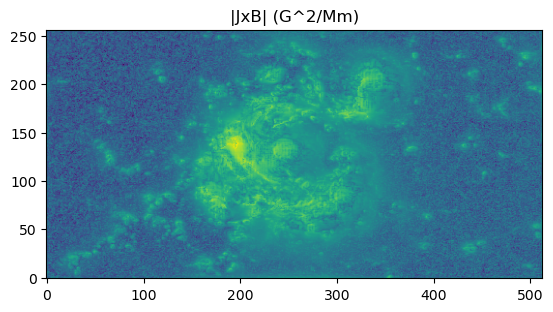

In [ ]:
plt.imshow(norm_JxB.sum(-1).T, origin='lower', norm=LogNorm())
plt.title("|JxB| (G^2/Mm)")

In [ ]:
div = Divergence(h=[dx, dy, dz])

In [ ]:
B = np.stack([Bx, By, Bz])
div_B = div(B)
div_B.shape

(513, 257, 257)

Text(0.5, 1.0, '|div B| (G/Mm)')

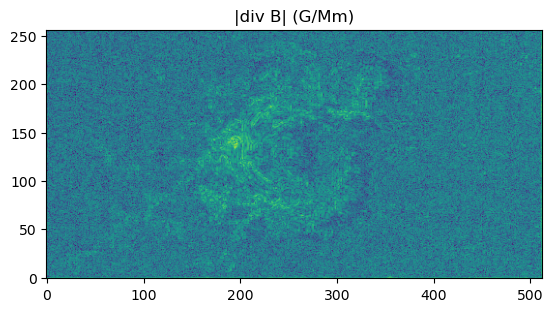

In [ ]:
plt.imshow(np.abs(div_B).sum(-1).T, origin='lower', norm=LogNorm())
plt.title("|div B| (G/Mm)")

In [ ]:
laplace = Laplacian(h=[dx, dy, dz])

laplace_Bx = laplace(Bx)
laplace_By = laplace(By)
laplace_Bz = laplace(Bz)

laplace_B = np.stack([laplace_Bx, laplace_By, laplace_Bz])
laplace_B.shape

(3, 513, 257, 257)

In [ ]:
norm_laplace_B = np.linalg.norm(laplace_B, axis=0)
norm_laplace_B.shape

(513, 257, 257)

Text(0.5, 1.0, '|laplace B| (G/Mm^2)')

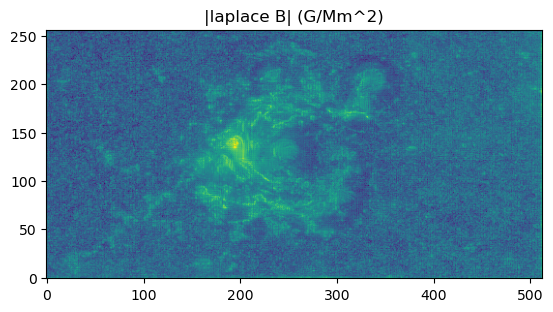

In [ ]:
plt.imshow(norm_laplace_B.sum(-1).T, origin='lower', norm=LogNorm())
plt.title("|laplace B| (G/Mm^2)")

In [ ]:
curl = Curl(h=[dx, dy, dz])
div = Divergence(h=[dx, dy, dz])
B = np.stack([Bx, By, Bz])

In [ ]:
JxB = np.cross(curl(B), B, axisa=0, axisb=0, axisc=0)
JxB.shape

(3, 513, 257, 257)

In [ ]:
dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]

dV = dx*dy*dz 
dV

0.19916739845722572

In [ ]:
Lx = x[-1] - x[0]
Ly = y[-1] - y[0]
Lz = z[-1] - z[0]

V = Lx*Ly*Lz 
V

6682948.928149916

In [ ]:
eps = 1e-6
integrand_force_free = np.sum(JxB**2, 0) / (np.sum(B**2, 0) + eps)
integrand_force_free.shape

(513, 257, 257)

In [ ]:
loss_force_free = (integrand_force_free.sum() * dV) / V
loss_force_free

393.2510412138299

In [ ]:
integrand_force_free.mean()

389.43605845405386

In [ ]:
div_B = div(B)
div_B.shape

(513, 257, 257)

In [ ]:
integrand_div_free = (div_B**2)
integrand_div_free.shape

(513, 257, 257)

In [ ]:
loss_div_free = (integrand_div_free.sum() * dV) / V
loss_div_free

87.96283217903292

In [ ]:
integrand_div_free.mean()

87.10949257380702

In [ ]:
div_pixel = Divergence(h=[1, 1, 1])
div_pixel_B = div_pixel(B)
div_pixel_B.shape

(513, 257, 257)

In [ ]:
integrand_div_pixel = (div_pixel_B ** 2)
integrand_div_pixel.shape

(513, 257, 257)

In [ ]:
integrand_div_pixel.mean()

33.19202535489721

In [ ]:
b_field = np.stack([Bx, By, Bz], axis=-1)
div_B_numpy = np.stack([np.gradient(b_field[..., i], axis=i, edge_order=2) for i in range(3)], axis=-1).sum(-1)
div_B_numpy.shape

(513, 257, 257)

In [ ]:
(div_B_numpy**2).mean()

33.192025354897176

In [ ]:
np.allclose(div_pixel_B, div_B_numpy)

True

[<matplotlib.lines.Line2D>]

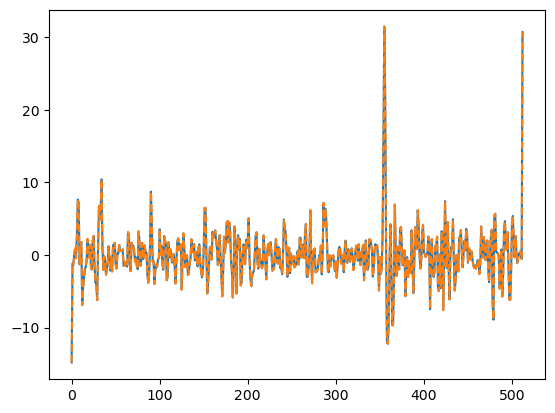

In [ ]:
plt.plot(div_pixel_B[:, 1, 1])
plt.plot(div_B_numpy[:, 1, 1], '--')

The current-weighted average of the sine of the angle between the magnetic field and the electrical current density

$$
\sigma_J = \frac{\sum_i \frac{|\vec{J}_i \times \vec{B}_i|}{B_i} }{\sum_i J_i} = \frac{\sum_i J_i \sigma_i}{\sum_i J_i}
$$

$$
\sigma_i = \frac{|\vec{J}_i \times \vec{B}_i|}{J_i B_i}
$$

current-weighted average angle $\theta_J$

$$
\theta_J = \arcsin (\sigma_J)
$$

average angle $<\theta_i>$

$$
\theta_i = \arcsin (\sigma_i)
$$

$<\theta_i>$ denotes the average angle over all grid points

Note that $\theta_J \neq <\theta_i>$





In [ ]:
B = np.stack([Bx, By, Bz])

curl = Curl(h=[dx, dy, dz])
J = curl(B)

J.shape, B.shape

((3, 513, 257, 257), (3, 513, 257, 257))

In [ ]:
JxB = np.cross(J, B, axisa=0, axisb=0, axisc=0)
JxB.shape

(3, 513, 257, 257)

In [ ]:
norm_B = np.linalg.norm(B, axis=0)
norm_J = np.linalg.norm(J, axis=0)
norm_JxB = np.linalg.norm(JxB, axis=0)

norm_B.shape, norm_J.shape, norm_JxB.shape

((513, 257, 257), (513, 257, 257), (513, 257, 257))

In [ ]:
eps = 1e-7
sigma_i = norm_JxB / (norm_J * norm_B + eps)

In [ ]:
sigma_i.shape

(513, 257, 257)

In [ ]:
sigma_J = (norm_J * sigma_i).sum() / norm_J.sum()
sigma_J * 1e2

67.33802726024818

In [ ]:
theta_J = np.arcsin(sigma_J)
theta_J, np.rad2deg(theta_J)

(0.7387716057657966, 42.328495034482856)

In [ ]:
theta_i = np.arcsin(sigma_i)
theta_i.shape

(513, 257, 257)

In [ ]:
theta_i_average = theta_i.mean()
theta_i_average, np.rad2deg(theta_i_average)

(0.8712006539958531, 49.916120582999525)

In [ ]:
cm_per_Mm = 1e8 # cm = 1 Mm

dx_cm = dx*cm_per_Mm
dy_cm = dy*cm_per_Mm
dz_cm = dz*cm_per_Mm

dV_cm3 = dx_cm * dy_cm * dz_cm
dV_cm3

1.9916739845722572e+23

In [ ]:
# energy (erg)
energy_component = ((Bx**2 + By**2 + Bz**2).sum() / (8* np.pi)) * dV_cm3
energy_component

2.174873006271556e+33

In [ ]:
# energy (erg)
energy_norm = ((np.linalg.norm(B, axis=0)**2).sum() / (8* np.pi)) * dV_cm3
energy_norm

2.174873006271556e+33

In [ ]:
Bx_pot = np.array(nc.variables['Bx_pot']).transpose(2, 1, 0)
By_pot = np.array(nc.variables['By_pot']).transpose(2, 1, 0)
Bz_pot = np.array(nc.variables['Bz_pot']).transpose(2, 1, 0)

In [ ]:
energy_pot = ((Bx_pot**2 + By_pot**2 + Bz_pot**2).sum() / (8* np.pi)) * dV_cm3
energy_pot

1.6343997486229756e+33

In [ ]:
free_energy = energy_component - energy_pot
free_energy

5.404732576485805e+32

In [ ]:
b_field = np.stack([Bx, By, Bz], axis=-1)

(((b_field**2).sum(-1) / (8*np.pi)).sum()) * dV_cm3

2.174873006271547e+33

In [ ]:
def energy_density(b_norm):
    return (b_norm**2) / (8*np.pi)

In [ ]:
B = np.stack([Bx, By, Bz])
B_energy_density = energy_density(np.linalg.norm(B, axis=0))
B_energy_density.shape

(513, 257, 257)

In [ ]:
B_pot = np.stack([Bx_pot, By_pot, Bz_pot])
B_pot_energy_density = energy_density(np.linalg.norm(B_pot, axis=0))
B_pot_energy_density.shape

(513, 257, 257)

In [ ]:
free_energy_density = B_energy_density - B_pot_energy_density
free_energy_density.shape

(513, 257, 257)

energy density

$$
\epsilon(x, y, z) = \frac{B^2(x,y,z)}{8\pi}
$$

energy

$$
E = \int_V \epsilon dV = \int_V \frac{B^2}{8\pi} dV = \int_V \frac{B^2(x,y,z)}{8\pi} dxdydz
$$

In [ ]:
B_energy_density.sum() * dV_cm3

2.174873006271547e+33

In [ ]:
B_pot_energy_density.sum() * dV_cm3

1.6343997486229687e+33

In [ ]:
B_energy_density.sum() * dV_cm3 - B_pot_energy_density.sum() * dV_cm3

5.404732576485782e+32

In [ ]:
free_energy = free_energy_density.sum() * dV_cm3
free_energy

5.40473257648573e+32

energy map

$$
E (x, y) = \int_z \frac{B^2(x,y,z)}{8\pi} dz
$$

$$
E (y, z) = \int_x \frac{B^2(x,y,z)}{8\pi} dx
$$

$$
E (x, z) = \int_y \frac{B^2(x,y,z)}{8\pi} dy
$$

In [ ]:
free_energy_density_xy = free_energy_density.sum(-1) * dz_cm
free_energy_density_yz = free_energy_density.sum(0) * dx_cm
free_energy_density_xz = free_energy_density.sum(1) * dy_cm

In [ ]:
z_Mm = 40
z_pixels = int(np.ceil(z_Mm / dz))
z.shape, z_pixels, z_pixels * dz

((257,), 63, 40.177831302)

<matplotlib.colorbar.Colorbar>

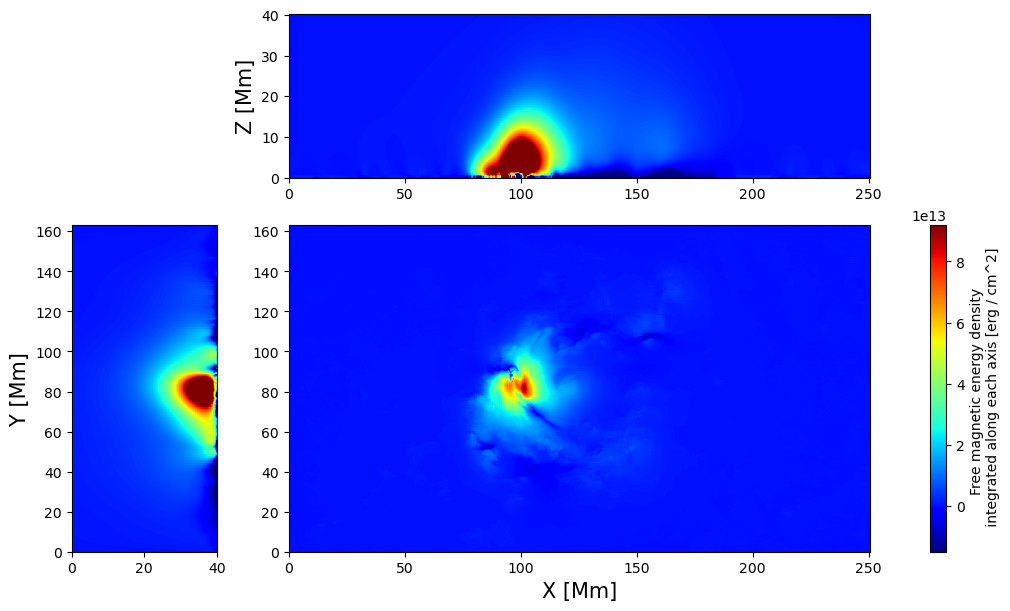

In [ ]:
z_Mm = 40
z_pixels = int(np.ceil(z_Mm / dz))

fig = plt.figure(figsize=(10, 6), layout='constrained')
ax = fig.subplot_mosaic(
    """
    .A
    BC
    """,
    height_ratios = [1, 2],
    width_ratios = [1, 4]
)

vmin = np.min(free_energy_density_xy)
vmax = np.max(free_energy_density_xy)

im = ax['C'].imshow(free_energy_density_xy.T, origin='lower', vmin=vmin, vmax=vmax, 
                    cmap='jet', aspect='auto', extent=(0, Lx, 0, Ly))
ax['C'].set_xlabel('X [Mm]', fontsize=15)

ax['A'].imshow(free_energy_density_xz[:, :z_pixels].T, origin='lower', vmin=vmin, vmax=vmax,
            cmap='jet', aspect='auto', extent=(0, Lx, 0, z_pixels * dz))
ax['A'].set_ylabel('Z [Mm]', fontsize=15)


# free_energy_density_yz --> (Z, Y)
# np.rot90(ree_energy_density_yz) --> (Y, Z)
# np.rot90(ree_energy_density_yz).T --> (Z, Y)
ax['B'].imshow(np.rot90(free_energy_density_yz[:, :z_pixels]).T, origin='lower', vmin=vmin, vmax=vmax,
            cmap='jet', aspect='auto', extent=(0, z_pixels * dz, 0, Ly))
ax['B'].set_ylabel('Y [Mm]', fontsize=15)


fig.colorbar(im, ax=ax['C'], label='Free magnetic energy density \n integrated along each axis [erg / cm^2]')


In [ ]:
def draw_projection(array3D, x, y, z, z_Mm=40):
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dz = z[1] - z[0]

    Lx = x[-1] - x[0]
    Ly = y[-1] - y[0]
    Lz = z[-1] - z[0]

    z_pixels = int(np.ceil(z_Mm / dz))

    dx_cm = dx * 1e8
    dy_cm = dy * 1e8
    dz_cm = dz * 1e8

    fig = plt.figure(figsize=(10, 6), layout='constrained')
    ax = fig.subplot_mosaic(
        """
        .A
        BC
        """,
        height_ratios = [1, 2],
        width_ratios = [1, 4]
    )

    array3D_xy = array3D.sum(-1) * dz_cm
    array3D_yz = array3D.sum(0) * dx_cm
    array3D_xz = array3D.sum(1) * dy_cm

    vmin = np.min(array3D_xy)
    vmax = np.max(array3D_xy)

    im = ax['C'].imshow(array3D_xy.T, origin='lower', vmin=vmin, vmax=vmax, 
                        cmap='jet', aspect='auto', extent=(0, Lx, 0, Ly))
    ax['C'].set_xlabel('X [Mm]', fontsize=15)

    ax['A'].imshow(array3D_xz[:, :z_pixels].T, origin='lower', vmin=vmin, vmax=vmax,
                cmap='jet', aspect='auto', extent=(0, Lx, 0, z_pixels * dz))
    ax['A'].set_ylabel('Z [Mm]', fontsize=15)

    ax['B'].imshow(np.rot90(array3D_yz[:, :z_pixels]).T, origin='lower', vmin=vmin, vmax=vmax,
                cmap='jet', aspect='auto', extent=(0, z_pixels * dz, 0, Ly))
    ax['B'].set_ylabel('Y [Mm]', fontsize=15)

    fig.colorbar(im, ax=ax['C'], label='Quantity \n integrated along each axis [(unit of quantity) * cm]')

    plt.show()

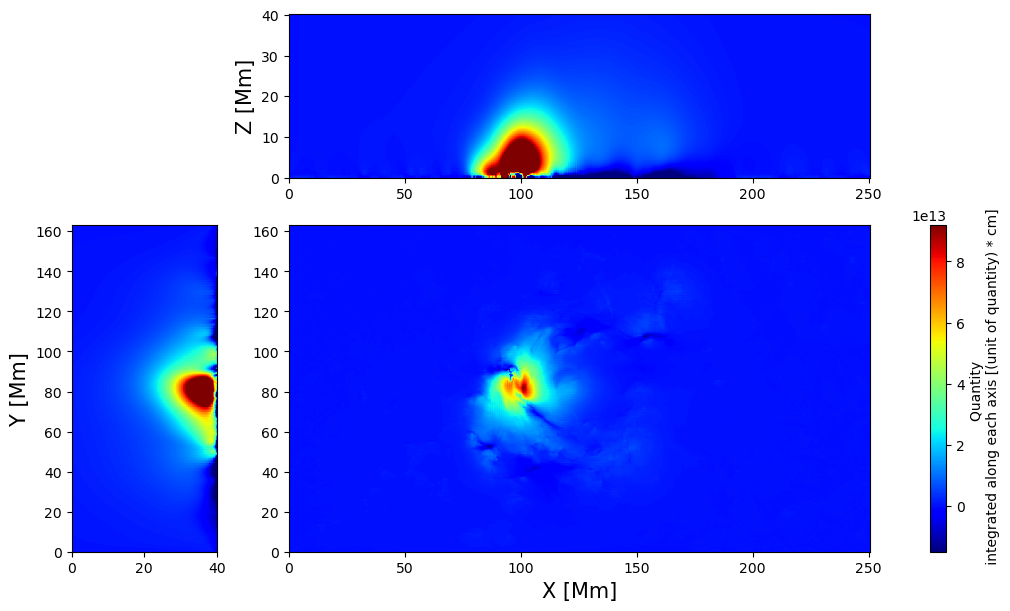

In [ ]:
draw_projection(free_energy_density, x, y, z)

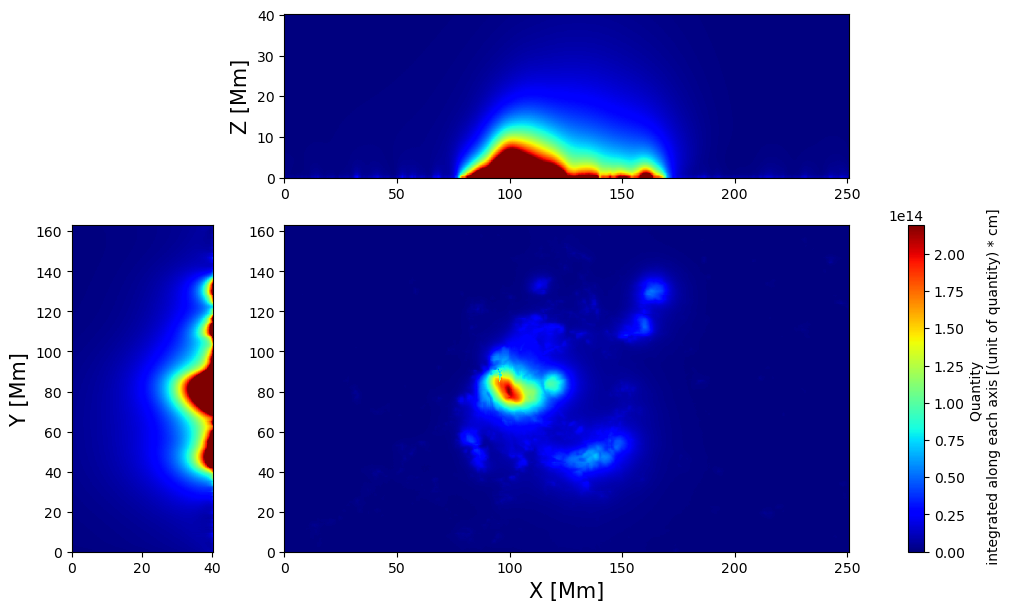

In [ ]:
draw_projection(B_energy_density, x, y, z)

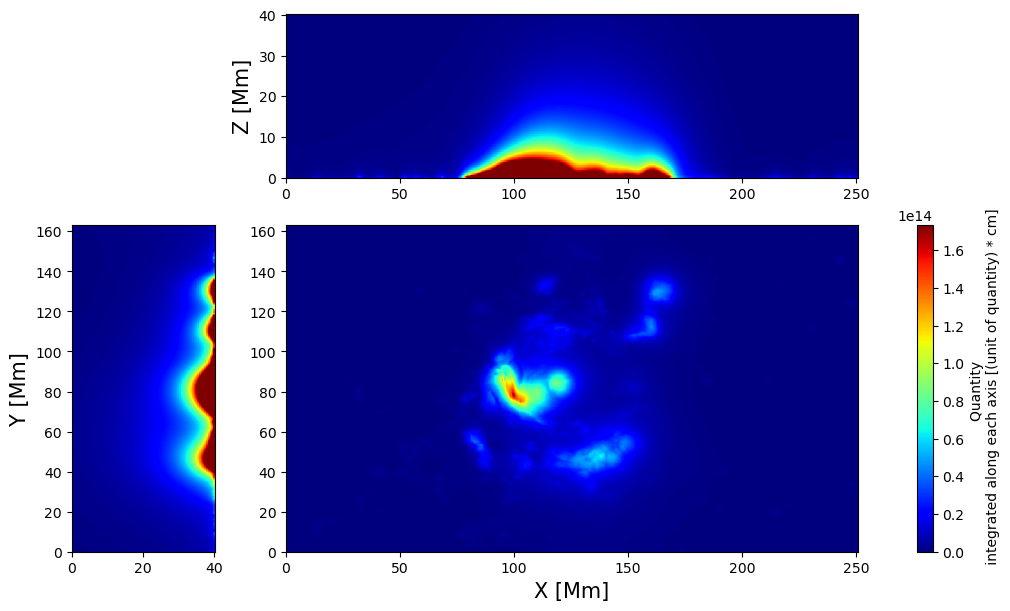

In [ ]:
draw_projection(B_pot_energy_density, x, y, z)

projection

$$
Q (x, y) = \int_z Q(x, y, z) dz
$$

$$
Q (y, z) = \int_x Q(x, y, z) dx
$$

$$
Q (x, z) = \int_y Q(x, y, z) dy
$$

In [ ]:
def draw_projection_log(array3D, x, y, z, title, z_Mm=40):
    dx = x[1] - x[0]
    dy = y[1] - y[0]
    dz = z[1] - z[0]

    Lx = x[-1] - x[0]
    Ly = y[-1] - y[0]
    Lz = z[-1] - z[0]

    z_pixels = int(np.ceil(z_Mm / dz))

    dx_cm = dx * 1e8
    dy_cm = dy * 1e8
    dz_cm = dz * 1e8

    fig = plt.figure(figsize=(10, 6), layout='constrained')
    ax = fig.subplot_mosaic(
        """
        .A
        BC
        """,
        height_ratios = [1, 2],
        width_ratios = [1, 4]
    )

    array3D_xy = array3D.sum(-1) * dz_cm
    array3D_yz = array3D.sum(0) * dx_cm
    array3D_xz = array3D.sum(1) * dy_cm

    vmin = np.min(array3D_xy)
    vmax = np.max(array3D_xy)
    if int(vmin) == 0:
        vmin = vmax*1e-6

    im = ax['C'].imshow(array3D_xy.T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax), 
                        aspect='auto', extent=(0, Lx, 0, Ly))
    ax['C'].set_xlabel('X [Mm]', fontsize=15)

    ax['A'].imshow(array3D_xz[:, :z_pixels].T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax),
                   aspect='auto', extent=(0, Lx, 0, z_pixels * dz))
    ax['A'].set_ylabel('Z [Mm]', fontsize=15)

    ax['B'].imshow(np.rot90(array3D_yz[:, :z_pixels]).T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax),
                  aspect='auto', extent=(0, z_pixels * dz, 0, Ly))
    ax['B'].set_ylabel('Y [Mm]', fontsize=15)

    fig.colorbar(im, ax=ax['C'], label='Quantity \n integrated along each axis [(unit of quantity) * cm]')
    fig.suptitle(title, fontsize=30)

    plt.show()

In [ ]:
def draw_projection_simple(array3D, title):
    fig = plt.figure(figsize=(10, 6), layout='constrained')
    ax = fig.subplot_mosaic(
        """
        .A
        BC
        """,
        height_ratios = [1, 2],
        width_ratios = [1, 4]
    )

    array3D_xy = array3D.sum(-1)
    array3D_yz = array3D.sum(0)
    array3D_xz = array3D.sum(1)

    vmin = np.min(array3D_xy)
    vmax = np.max(array3D_xy)
    if int(vmin) == 0:
        vmin = vmax*1e-6

    im = ax['C'].imshow(array3D_xy.T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax), aspect='auto')
    ax['C'].set_xlabel('X', fontsize=15)

    ax['A'].imshow(array3D_xz.T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax), aspect='auto')
    ax['A'].set_ylabel('Z', fontsize=15)

    ax['B'].imshow(np.rot90(array3D_yz).T, origin='lower', norm=LogNorm(vmin=vmin, vmax=vmax), aspect='auto')
    ax['B'].set_ylabel('Y', fontsize=15)

    fig.colorbar(im, ax=ax['C'], label='sum of Quantity \n along each axis')
    fig.suptitle(title, fontsize=30)

    plt.show()

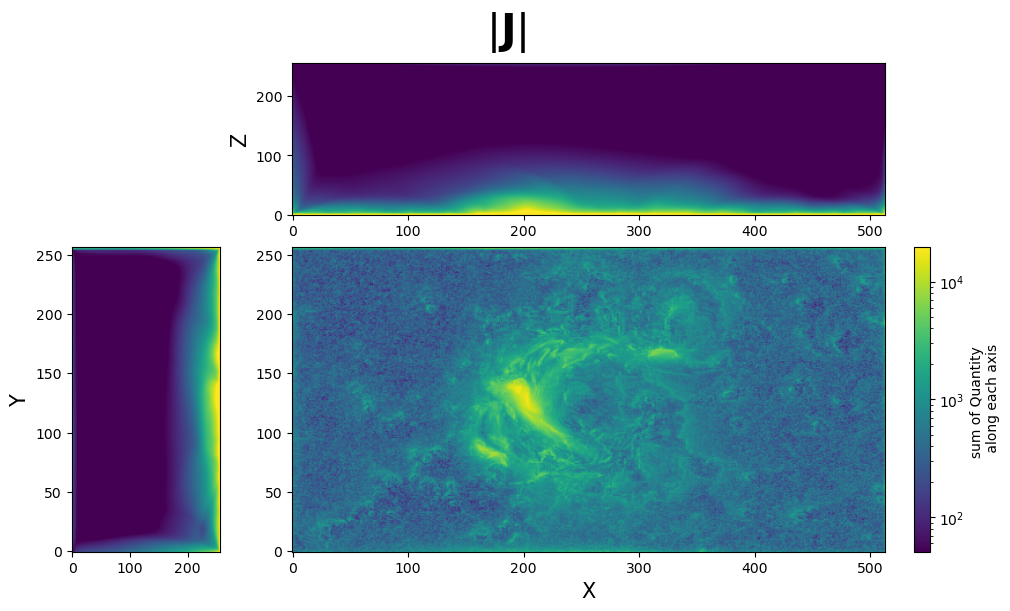

In [ ]:
draw_projection_simple(np.linalg.norm(J, axis=0), r"$|\mathbf{J}|$")

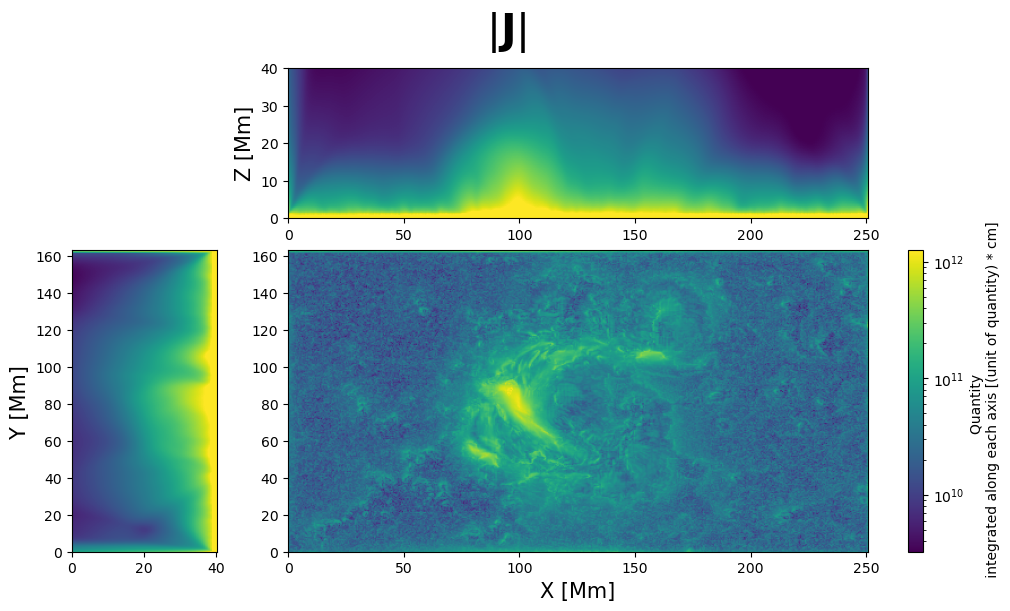

In [ ]:
draw_projection_log(np.linalg.norm(J, axis=0), x, y, z, r"$|\mathbf{J}|$")

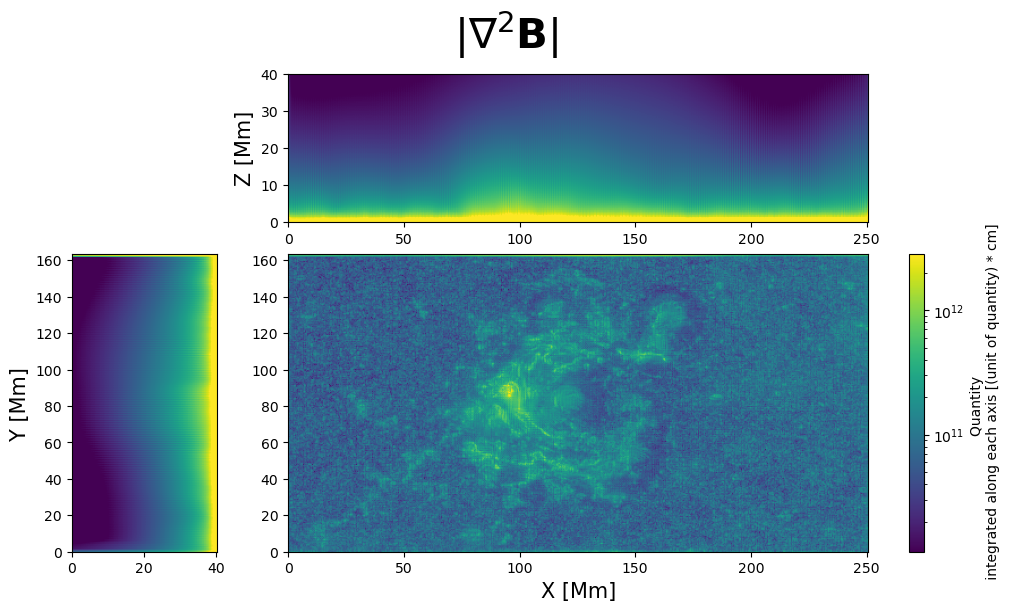

In [ ]:
draw_projection_log(np.linalg.norm(laplace_B, axis=0), x, y, z, r"$|\nabla^2 \mathbf{B}|$")

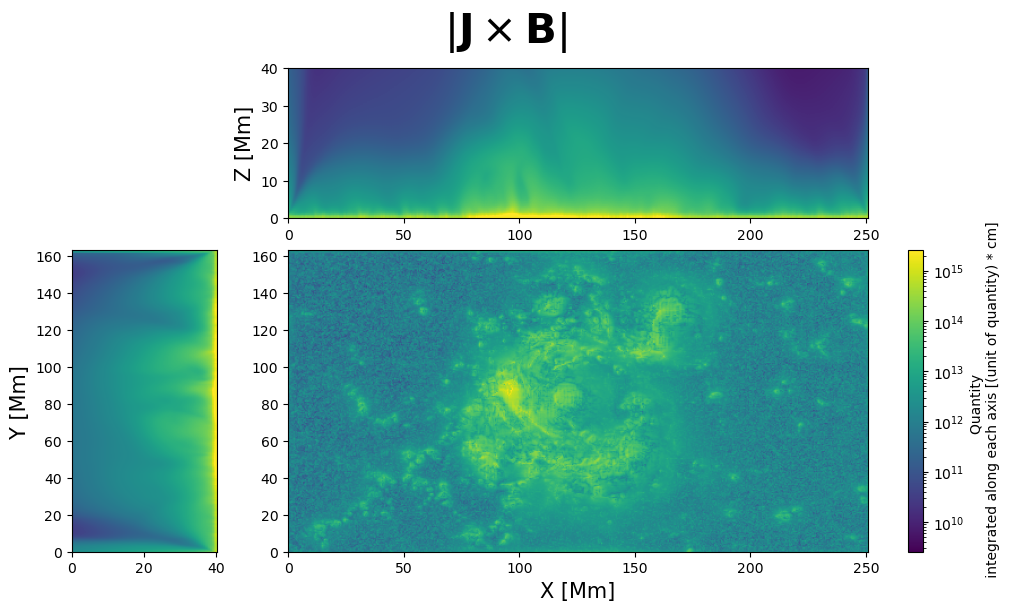

In [ ]:
draw_projection_log(np.linalg.norm(JxB, axis=0), x, y, z, r"$|\mathbf{J} \times \mathbf{B}|$")

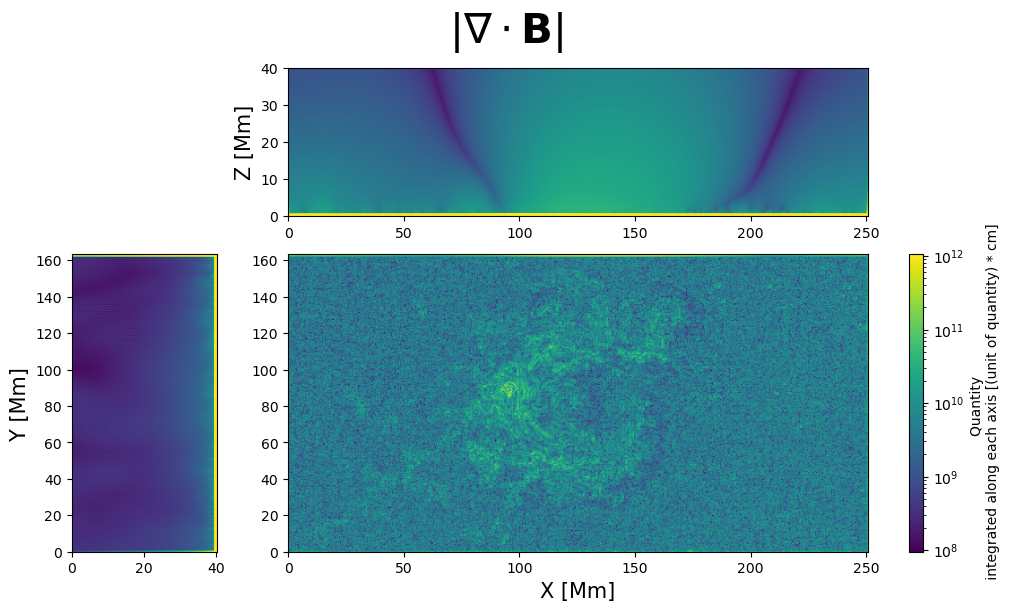

In [ ]:
draw_projection_log(np.abs(div_B), x, y, z, r"$|\nabla \cdot \mathbf{B}|$")